<a href="https://colab.research.google.com/github/blazaropinto/portfolio_PDA_Data_Science/blob/development/Performing_statistical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding measures of central tendency (max, min, mean, median) and the standard deviation

### Group by state and calculate statistics

Run the function get_income_df() and store the result in a new dataframe called **income_df**.

Group income_df by State and calculate some statistics on the groups. Calculate the same statistics without grouping to compare.

Add a description, in the cell below, of what the statistics show and why in the text box.

In [16]:
import pandas as pd

excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'

In [17]:
def get_income_df(excelfile_url):
  county_level_df = pd.read_excel(excelfile_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excelfile_url, sheet_name='state-level')
  income_new_df = pd.read_excel(excelfile_url, sheet_name='income')

  county_level_df['Pop']= county_level_df.Population
  county_level_df.drop('Population', axis=1, inplace=True)
  state_level_df.Pop = round((state_level_df.Pop / 1000), 0).astype(int)

  combined_df = pd.concat([county_level_df, state_level_df], ignore_index=True, join='inner')
  final_df = combined_df.append(income_new_df)
  final_df.sort_values('Pop', ascending=False, inplace=True)    # sort by 'Pop' to get the output above

  return final_df

In [19]:
income_df = get_income_df(excel_url)
income_df.groupby('State').agg(['min', 'mean', 'median', 'max', 'var', 'std', 'skew']).round(2)

Age                                 ...    Pop                                
      min   mean median max    var   std  ...   mean median max     var    std  skew
State                                     ...                                       
CA     29  33.00     35  35  12.00  3.46  ...  31.33     30  54  485.33  22.03  0.27
IN     32  38.00     41  41  27.00  5.20  ...  17.33     23  24  114.33  10.69 -1.72
MD     22  28.08     27  41  27.08  5.20  ...  44.38     34  98  951.42  30.85  0.55
NY     29  32.33     34  34   8.33  2.89  ...  12.00     11  18   31.00   5.57  0.78
TX     23  34.18     35  42  37.96  6.16  ...  39.18     28  82  678.56  26.05  0.51

[5 rows x 21 columns]

In [ ]:
income_df[['Age',	'Income', 'Pop']].agg(['min', 'mean', 'median', 'max', 'std', 'skew']).round(2) 

,Age,Income,Pop
min,22.00,22.00,5.00
mean,31.85,62.12,36.06
median,32.00,66.00,27.00
max,42.00,81.00,98.00
std,6.03,14.68,27.00
skew,0.13,-1.10,0.85


The **statistics** shown above give an idea of the distributions of the data and allow us to get some ideas:

* the data gathered in all states correspond to a not very spread age range (all data seem to correspond to professionals around the first 20 years of their working life).
    * the people in the dataset seem to be a bit older in IN (most around 40 years old).
    * the largest distribution and the lower average of age within this data is in MD.
    * CA, IN and NY have a low proportion of younger people (all three distributions are highly skewed) and none under 29 years old. 
    * the age distribution in MD is also highly skewed towards the other end.
* the income earned by these NY workers is almost double the income of the part of the dataset corresponding to IN, looking at all main statistics. The latter state has the higher variety in income figures.
* 'Pop' is higher in CA and MD, with a roughly doubled variance in the latter state.


# Performing a linear regression



### Is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  calculate and display **r_squared** from rvalue (`regression.rvalue`)  
(*Expected output:  0.021866754112003717 - this value is used to calculate R squared, the correlation coefficient which indicates how closely the that there is a very weak correlation between Age and Income.  The negative value of rvalue indicates that any correlation is inverse, ie as Age goes up, Income goes down*) 

In [20]:
import pandas as pd
from scipy.stats import linregress

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")
county_level_df.head()

,State,County,Population,Age,Income
0,TX,1,72,34,65
1,TX,2,33,42,45
2,TX,5,25,23,46
3,TX,6,54,36,65
4,TX,7,11,42,53


In [21]:
# complete the lines of code (reference the instructions above)
x = county_level_df.Age
y = county_level_df.Income
regression = linregress(x,y)
# display the regression
display(regression)
# display the slope
display(regression.slope)
# display the intercept
display(regression.intercept)
# calculate and display r_squared
r_squared = regression.rvalue ** 2
display(r_squared)

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

-0.31433084434233205

72.78388856978748

0.021866754112003717

### Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Test output**:   
0.013558605755058871


In [22]:
regression_pop_inc = linregress(county_level_df.Population, county_level_df.Income)
display(regression_pop_inc.rvalue ** 2)

0.013558605755058871

--> Those variables seem to have no correlation (or very low)

### Does Stress predict Wellbeing?
---

Repeat the steps in th previous exercises to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [26]:
url_pos_p = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true%22'

new_df = pd.read_csv(url_pos_p)
new_df.head(3)

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017


In [27]:
regression_stress = linregress(new_df.Stress, new_df.Wellbeing)
display (regression_stress, regression_stress.rvalue**2, regression_stress.pvalue)
slope_stress  = regression_stress.slope
intercept_stress = regression_stress.intercept

LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

0.4507725540176983

6.084540561441803e-07

--> Assuming an alpha value of 0.05, p is lower so the prediction is good

--> R squared is close to 0.5, so the variables seem to be fairly correlated but doesn't really behave in the same way

In [28]:
def check_significance_regression(p_value, alpha):
  if p_value < alpha:
    return "It's a good model"
  else:
    return "The model isn't statistically significant"


print(check_significance_regression(regression_pop_inc.pvalue, 0.05))
print(check_significance_regression(regression_stress.pvalue, 0.05))

The model isn't statistically significant
It's a good model


# Checking for normal distribution

### Histogram check 
---
For this exercise please use the Psychological Wellbeing dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* Load in necessary libraries (pandas and matplotlib.pyplot) 
* Load in and check the data for missing values (try .info() .describe() )
* Familiarise yourself with the data 
* Plot a histogram of Resilliance (plt.hist(data)) 
* Look at the shape of the data - does it look normally distributed?


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

url_pw = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true%22'

df_pw = pd.read_csv(url_pw)
display(df_pw.head(), df_pw.info(), df_pw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017


None

,Age,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,26.568182,8.193182,3.788636,34.681818,24.113636,21.659091,19.022727,12.045455,20.727273,2017.0
std,8.968673,11.121536,0.866824,6.461956,7.421577,7.935622,5.534201,5.709863,8.420251,0.0
min,14.000000,0.000000,2.300000,18.000000,7.000000,3.000000,7.000000,4.000000,4.000000,2017.0
25%,22.750000,0.000000,3.225000,30.000000,20.000000,18.500000,17.000000,8.000000,12.750000,2017.0
50%,24.000000,1.500000,3.915000,35.000000,25.500000,21.500000,19.000000,11.500000,23.500000,2017.0
75%,26.250000,19.750000,4.325000,39.250000,28.250000,28.000000,22.250000,16.000000,28.000000,2017.0
max,74.000000,30.000000,6.700000,47.000000,38.000000,37.000000,30.000000,27.000000,32.000000,2017.0


--> There are recognized missing values only in the column firstlanguage

--> The column sex could be converted to "category" type

(array([ 1.,  1.,  3.,  4.,  6., 10.,  6.,  7.,  3.,  3.]),
 array([18. , 20.9, 23.8, 26.7, 29.6, 32.5, 35.4, 38.3, 41.2, 44.1, 47. ]),
 <a list of 10 Patch objects>)

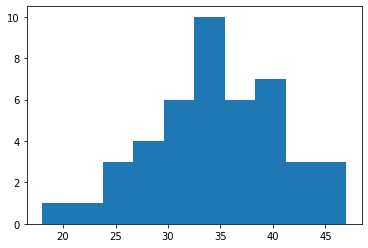

In [30]:
plt.hist(df_pw.Resilliance)

### Probability Plot
---

As you can see in previous execise, it is not entirely obvious whether the data is actually normally distributed, even if it has the rough shape...  

Therefore, we need to do a second check

To perform the probability plot we need to load in another library:  
`from scipy import stats` 

* Make a probability plot of the above data 

` stats.probplot(data, plot = plt)` 

* Look at the plot, are the dots following the line?
* If the plot shows a straight line of dots it suggests the data is Gaussian! 

As we mentioned earlier, when checking for normality, we look to see how the actual data compares to a theoretical line or graph if that data was normally distributed. If the dots (actual data) follow the theoretical line on the plot, it shows the 2 are similar and therefore normally distributed. 

((array([-2.15374952, -1.77530174, -1.55088744, -1.38514138, -1.25057432,
         -1.1354892 , -1.03375442, -0.94172868, -0.85705923, -0.7781294 ,
         -0.70377435, -0.63312213, -0.5654989 , -0.50036931, -0.43729746,
         -0.3759202 , -0.31592847, -0.25705362, -0.19905725, -0.14172333,
         -0.08485191, -0.02825382,  0.02825382,  0.08485191,  0.14172333,
          0.19905725,  0.25705362,  0.31592847,  0.3759202 ,  0.43729746,
          0.50036931,  0.5654989 ,  0.63312213,  0.70377435,  0.7781294 ,
          0.85705923,  0.94172868,  1.03375442,  1.1354892 ,  1.25057432,
          1.38514138,  1.55088744,  1.77530174,  2.15374952]),
  array([18, 22, 25, 26, 26, 28, 29, 29, 29, 30, 30, 30, 30, 31, 32, 33, 33,
         33, 34, 34, 34, 35, 35, 35, 35, 36, 37, 37, 37, 37, 38, 39, 39, 40,
         40, 41, 41, 41, 42, 42, 44, 45, 47, 47])),
 (6.612420657288927, 34.68181818181818, 0.9942065542657863))

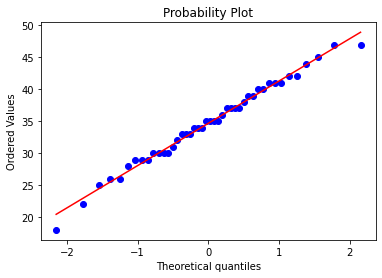

In [31]:
from scipy import stats

stats.probplot(df_pw.Resilliance, plot = plt)

### Histogram of non-Gaussian data 
---
For this exercise use the US election data: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/presDirty.csv"  

* Load in and check the data for missing values
* Use dropna() if needed
* Familiarise yourself with the data
* Plot a histogram of national_turnout
* Look at the shape of the data - does it look normally distributed?

In [32]:
url_USe = 'https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/presDirty.csv'

df_USe = pd.read_csv(url_USe)

display(df_USe.head(), df_USe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       156 non-null    int64  
 1   branch                      156 non-null    object 
 2   model                       156 non-null    object 
 3   modeldate                   156 non-null    object 
 4   candidate_inc               156 non-null    object 
 5   candidate_chal              156 non-null    object 
 6   nat_voteshare_other_hi      156 non-null    float64
 7   national_voteshare_inc_lo   156 non-null    float64
 8   national_voteshare_chal_lo  156 non-null    float64
 9   national_voteshare_3rd_lo   0 non-null      float64
 10  nat_voteshare_other_lo      156 non-null    float64
 11  national_turnout            59 non-null     float64
 12  national_turnout_hi         59 non-null     float64
 13  national_turnout_lo         59 non-

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,national_voteshare_3rd_lo,nat_voteshare_other_lo,national_turnout,national_turnout_hi,national_turnout_lo,timestamp,simulations
0,2020,President,polls-plus,11/03/2020,Trump,Biden,1.842986,42.91262,50.87952,NaN,0.724433,157972048.0,168424640.0,147487920.0,03/11/2020 00:00,40000
1,2020,President,polls-plus,11/02/2020,Trump,Biden,1.842986,42.91348,50.88025,NaN,0.724433,157972048.0,168424640.0,147487920.0,02/11/2020 23:45,40000
2,2020,President,polls-plus,11/02/2020,Trump,Biden,1.842986,42.91348,50.88025,NaN,0.724433,157972048.0,168424640.0,147487920.0,02/11/2020 23:45,40000
3,2020,President,polls-plus,10/31/2020,Trump,Biden,1.835479,42.98096,50.74764,NaN,0.689802,158044784.0,168497376.0,147560672.0,31/10/2020 22:23,40000
4,2020,President,polls-plus,10/30/2020,Trump,Biden,1.847821,42.92510,50.72821,NaN,0.692837,156723120.0,167175712.0,146239008.0,30/10/2020 21:34,40000


None

In [33]:
df_USe.drop(columns=['national_voteshare_3rd_lo'], inplace=True)
df_USe.dropna(subset=['national_turnout'], inplace=True)
df_USe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       59 non-null     int64  
 1   branch                      59 non-null     object 
 2   model                       59 non-null     object 
 3   modeldate                   59 non-null     object 
 4   candidate_inc               59 non-null     object 
 5   candidate_chal              59 non-null     object 
 6   nat_voteshare_other_hi      59 non-null     float64
 7   national_voteshare_inc_lo   59 non-null     float64
 8   national_voteshare_chal_lo  59 non-null     float64
 9   nat_voteshare_other_lo      59 non-null     float64
 10  national_turnout            59 non-null     float64
 11  national_turnout_hi         59 non-null     float64
 12  national_turnout_lo         59 non-null     float64
 13  timestamp                   59 non-nu

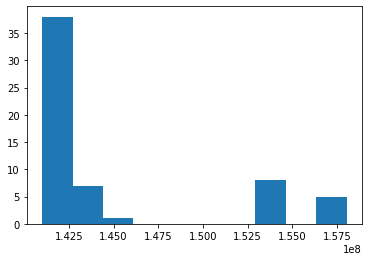

In [34]:
plt.hist(df_USe.national_turnout)
plt.show()

###  Prob plot of non-Gaussian data 
---

* Using stats.probplot() make a probability plot of national_turnout
* Does the data look normally distributed?

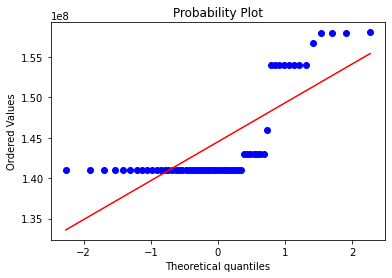

In [35]:
stats.probplot(df_USe.national_turnout, plot=plt)
plt.show()

--> It doesn't look normally distributed

### Linear regression on normal data 
---

Referring back to the correlation and visualisation worksheet and using the wellbeing dataset:

* Perform a linear regression (stats.linregress) to find a line of best fit between Resilliance (x) and selfesteem (y)
* Note as our y values are what we are observing (eg affecting) they do not need to be normally distributed, BUT for a meaningful result the x values do
* Plot a scatterplot with line of best fit 

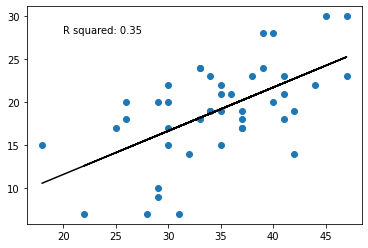

In [36]:
regression_rs = stats.linregress(df_pw.Resilliance, df_pw.selfesteem)

plt.scatter(df_pw.Resilliance, df_pw.selfesteem)
plt.plot(df_pw.Resilliance, df_pw.Resilliance * regression_rs.slope + regression_rs.intercept, 'k-')
plt.text(20,28, 'R squared: '+ str(round(regression_rs.rvalue**2,2)))
plt.show()

In [37]:
from statsmodels.formula.api import ols

result_model = ols('df_pw.Resilliance ~ df_pw.selfesteem', data = df_pw).fit()
result_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      df_pw.Resilliance   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     22.58
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           2.37e-05
Time:                        10:43:13   Log-Likelihood:                -134.56
No. Observations:                  44   AIC:                             273.1
Df Residuals:                      42   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.5474      2.876      7.492      0.000      15.744      27.351
df_pw.selfesteem     0.6905      0.145      4.752      0.000       0.397       0.984
==============================================================================
Omnibus:                        1.038   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.672
Skew:                          -0.303   Prob(JB):                        0.715
Kurtosis:                       3.008   Cond. No.                         71.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""